In [1]:
from bayesgpr.gpr import GPR
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
np.random.seed(0)

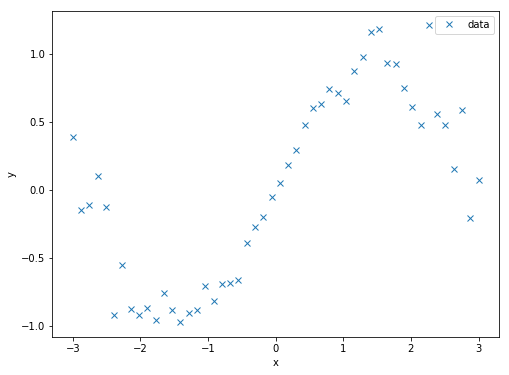

In [2]:
# observed data
x = np.linspace(-3,3,50)

# noisy observed labels
t = np.sin(x) + np.random.normal(size=x.shape)*abs(x)*1e-1


# illustrate data
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax.plot(x,t,marker="x",linestyle="none",label="data")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()

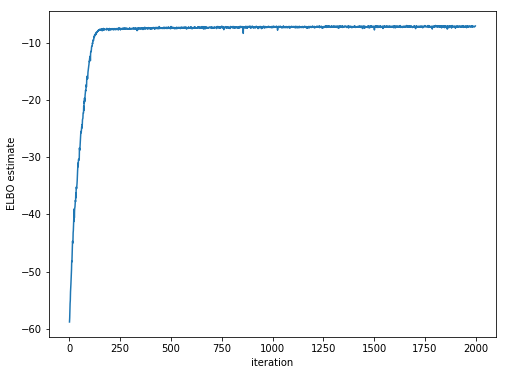

In [3]:
model = GPR(Nsample=500,maxiter=250,lr=5e-4,decay_rate=1e-1,alpha=1e-3)

model.fit(x,t)


fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

ax.plot(np.arange(len(model.loss)),model.loss)
ax.set_xlabel("iteration")
ax.set_ylabel("ELBO estimate")
plt.show()

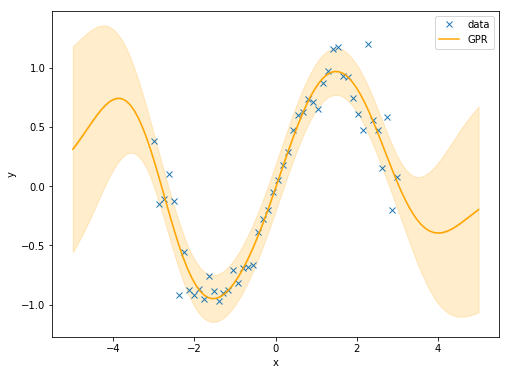

In [9]:
xtest = np.linspace(-5,5,100)



fig,_ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))


mean,std = model.predict(xtest)

_ax.plot(x,t,marker="x",linestyle="none",label="data")
_ax.plot(xtest,mean,color="orange",label="GPR")
_ax.fill_between(xtest,mean-std,mean,color="orange",alpha=0.2)
_ax.fill_between(xtest,mean,mean+std,color="orange",alpha=0.2)
_ax.set_xlabel("x")
_ax.set_ylabel("y")
_ax.legend()

plt.show()